In [1]:
import os
from pathlib import Path

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from tbparse import SummaryReader

In [2]:
log_dir = str(os.path.abspath(os.path.join(str(Path.home()), 'forl-exp/wolfpack')))
reader = SummaryReader(log_dir, extra_columns={'dir_name'})
df = reader.scalars

In [3]:
df['tag'].unique().tolist()

['ray/tune/agent_timesteps_total',
 'ray/tune/connector_metrics/ObsPreprocessorConnector_ms',
 'ray/tune/connector_metrics/StateBufferConnector_ms',
 'ray/tune/connector_metrics/ViewRequirementAgentConnector_ms',
 'ray/tune/counters/num_agent_steps_sampled',
 'ray/tune/counters/num_agent_steps_trained',
 'ray/tune/counters/num_env_steps_sampled',
 'ray/tune/counters/num_env_steps_trained',
 'ray/tune/done',
 'ray/tune/episode_len_mean',
 'ray/tune/episode_reward_max',
 'ray/tune/episode_reward_mean',
 'ray/tune/episode_reward_min',
 'ray/tune/episodes_this_iter',
 'ray/tune/episodes_total',
 'ray/tune/info/learner/central_planner/diff_num_grad_updates_vs_sampler_policy',
 'ray/tune/info/learner/central_planner/learner_stats/cur_lr',
 'ray/tune/info/learner/central_planner/learner_stats/planner_policy_loss',
 'ray/tune/info/learner/central_planner/learner_stats/planner_reward_cost',
 'ray/tune/info/learner/central_planner/learner_stats/planner_reward_std',
 'ray/tune/info/learner/centra

In [4]:
df['dir_name'].unique().tolist()

['amd-cum-r-delay_model-lstm_assump-softmax/AMDPPO_wolfpack_8589a_00000_0_2023-06-10_22-22-31',
 'amd-cum-r-immediate_model-lstm_assump-softmax/AMDPPO_wolfpack_95b98_00000_0_2023-06-11_09-28-42',
 'amd-qadj-delay_model-conv_assump-neural/AMDPPO_wolfpack_87bd0_00000_0_2023-06-10_22-22-39',
 'amd-qadj-delay_model-conv_assump-softmax/AMDPPO_wolfpack_71169_00000_0_2023-06-11_09-49-08',
 'amd-qadj-delay_model-lstm_assump-neural/AMDPPO_wolfpack_baf4f_00000_0_2023-06-11_09-36-57',
 'amd-qadj-delay_model-lstm_assump-softmax/AMDPPO_wolfpack_da3fc_00000_0_2023-06-11_20-22-01',
 'no-amd_model-conv/AMDPPO_wolfpack_0e948_00000_0_2023-06-11_20-30-37',
 'no-amd_model-conv/AMDPPO_wolfpack_88f54_00000_0_2023-06-11_09-28-21',
 'no-amd_model-lstm/AMDPPO_wolfpack_2f635_00000_0_2023-06-11_20-31-36',
 'no-amd_model-lstm/AMDPPO_wolfpack_7dce8_00000_0_2023-06-10_22-22-18']

In [13]:
trial_dict = {
    'amd-cum-r-delay_model-lstm_assump-softmax/AMDPPO_wolfpack_8589a_00000_0_2023-06-10_22-22-31': 'AMD + LSTM + softmax + R + delay',
    'amd-cum-r-immediate_model-lstm_assump-softmax/AMDPPO_wolfpack_95b98_00000_0_2023-06-11_09-28-42': 'AMD + LSTM + softmax + R',
    'amd-qadj-delay_model-conv_assump-neural/AMDPPO_wolfpack_87bd0_00000_0_2023-06-10_22-22-39': 'AMD + Conv + neural + Q + delay',
    'amd-qadj-delay_model-conv_assump-softmax/AMDPPO_wolfpack_71169_00000_0_2023-06-11_09-49-08': 'AMD + Conv + softmax + Q + delay',
    'amd-qadj-delay_model-lstm_assump-neural/AMDPPO_wolfpack_baf4f_00000_0_2023-06-11_09-36-57': 'AMD + LSTM + neural + Q + delay',
    'amd-qadj-delay_model-lstm_assump-softmax/AMDPPO_wolfpack_da3fc_00000_0_2023-06-11_20-22-01': "AMD + LSTM + softmax + Q + delay",
    'no-amd_model-conv/AMDPPO_wolfpack_0e948_00000_0_2023-06-11_20-30-37': 'PPO + Conv',
    'no-amd_model-conv/AMDPPO_wolfpack_88f54_00000_0_2023-06-11_09-28-21': 'PPO + Conv (2nd)',
    'no-amd_model-lstm/AMDPPO_wolfpack_2f635_00000_0_2023-06-11_20-31-36': 'PPO + LSTM',
    'no-amd_model-lstm/AMDPPO_wolfpack_7dce8_00000_0_2023-06-10_22-22-18': 'PPO + LSTM (2nd)',
}
df['trials'] = df['dir_name'].apply(trial_dict.get)

In [14]:
list(trial_dict.values())

['AMD + LSTM + softmax + R + delay',
 'AMD + LSTM + softmax + R',
 'AMD + Conv + neural + Q + delay',
 'AMD + Conv + softmax + Q + delay',
 'AMD + LSTM + neural + Q + delay',
 'AMD + LSTM + softmax + Q + delay',
 'PPO + Conv',
 'PPO + Conv (2nd)',
 'PPO + LSTM',
 'PPO + LSTM (2nd)']

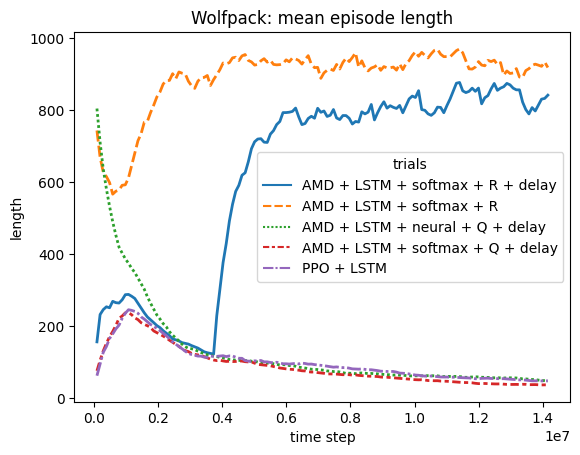

In [33]:
new_df = df[df['tag'] == 'ray/tune/episode_len_mean']
new_df = new_df[new_df['trials'].isin([
    'AMD + LSTM + softmax + R + delay',
    'AMD + LSTM + softmax + R',
    # 'AMD + Conv + neural + Q + delay',
    # 'AMD + Conv + softmax + Q + delay',
    'AMD + LSTM + neural + Q + delay',
    'AMD + LSTM + softmax + Q + delay',
    # 'PPO + Conv',
    # 'PPO + Conv (2nd)'
    'PPO + LSTM',
    # 'PPO + LSTM (2nd)'
])]
new_df['value'] = new_df['value'].ewm(com=5).mean()

g = sns.lineplot(
    data=new_df,
    x='step',
    y='value',
    hue='trials',
    legend='full',
    style='trials',
    linewidth=2,
    dashes=True,
    markers=False,
    seed=1234,
)
g.set(xlabel='time step', ylabel='length', title='Wolfpack: mean episode length')
plt.savefig('./wolfpack_lstm_length.pdf')

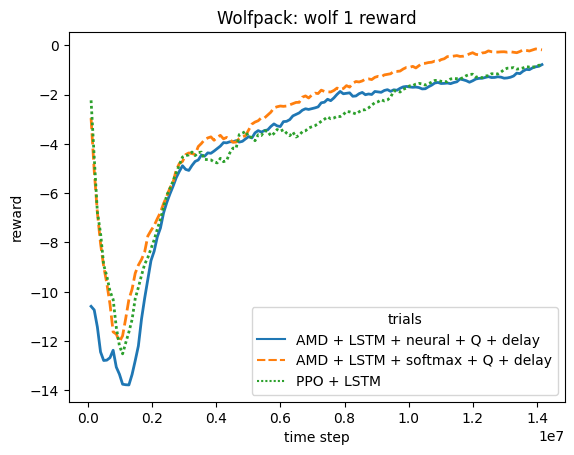

In [38]:
new_df = df[df['tag'] == 'ray/tune/policy_reward_mean/wolf_1']
new_df = new_df[new_df['trials'].isin([
    # 'AMD + LSTM + softmax + R + delay',
    # 'AMD + LSTM + softmax + R',
    # 'AMD + Conv + neural + Q + delay',
    # 'AMD + Conv + softmax + Q + delay',
    'AMD + LSTM + neural + Q + delay',
    'AMD + LSTM + softmax + Q + delay',
    # 'PPO + Conv',
    'PPO + LSTM',
    # 'PPO + LSTM (2nd)'
])]
new_df['value'] = new_df['value'].ewm(com=3).mean()
g = sns.lineplot(
    data=new_df,
    x='step',
    y='value',
    hue='trials',
    legend='full',
    style='trials',
    linewidth=2,
    dashes=True,
    markers=False,
    seed=1234,
)
g.set(xlabel='time step', ylabel='reward', title='Wolfpack: wolf 1 reward')
plt.savefig('./wolfpack_lstm_reward_w1.pdf')

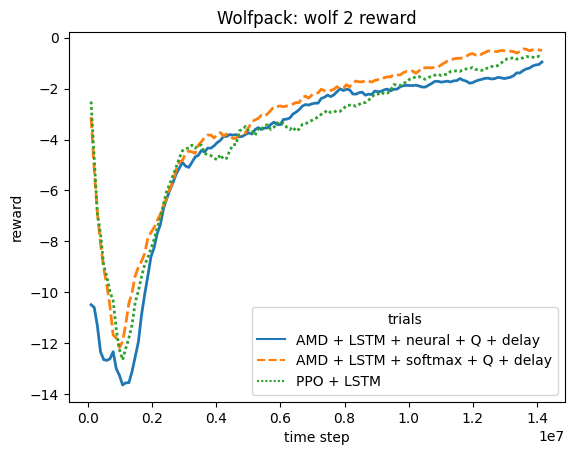

In [37]:
new_df = df[df['tag'] == 'ray/tune/policy_reward_mean/wolf_2']
new_df = new_df[new_df['trials'].isin([
    # 'AMD + LSTM + softmax + R + delay',
    # 'AMD + LSTM + softmax + R',
    # 'AMD + Conv + neural + Q + delay',
    # 'AMD + Conv + softmax + Q + delay',
    'AMD + LSTM + neural + Q + delay',
    'AMD + LSTM + softmax + Q + delay',
    # 'PPO + Conv',
    'PPO + LSTM',
    # 'PPO + LSTM (2nd)'
])]
new_df['value'] = new_df['value'].ewm(com=3).mean()
g = sns.lineplot(
    data=new_df,
    x='step',
    y='value',
    hue='trials',
    legend='full',
    style='trials',
    linewidth=2,
    dashes=True,
    markers=False,
    seed=1234,
)
g.set(xlabel='time step', ylabel='reward', title='Wolfpack: wolf 2 reward')
plt.savefig('./wolfpack_lstm_reward_w2.pdf')

/tmp/ipykernel_2250/779161456.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['value'] = new_df['value'].ewm(com=7).mean()


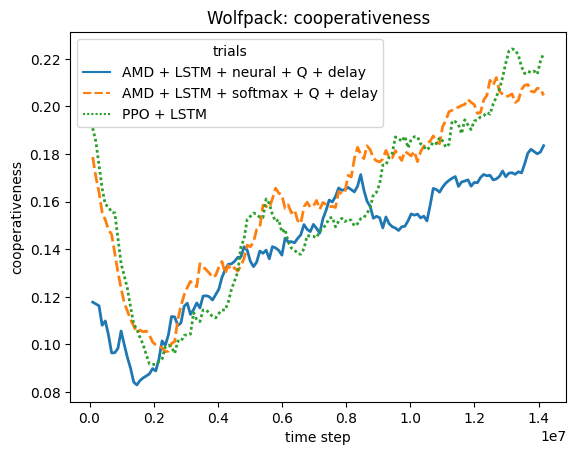

In [32]:
new_df = df[(df['tag'] == 'ray/tune/info/learner/wolf_1/learner_stats/cooperativeness') & (
    df['trials'].isin([
        # 'AMD + LSTM + softmax + R + delay',
        # 'AMD + LSTM + softmax + R',
        # 'AMD + Conv + neural + Q + delay',
        # 'AMD + Conv + softmax + Q + delay',
        'AMD + LSTM + neural + Q + delay',
        'AMD + LSTM + softmax + Q + delay',
        # 'PPO + Conv',
        'PPO + LSTM',
        # 'PPO + LSTM (2nd)'
    ]))]

new_df['value'] = new_df['value'].ewm(com=7).mean()

g = sns.lineplot(
    data=new_df,
    x='step',
    y='value',
    hue='trials',
    legend='full',
    style='trials',
    linewidth=2,
    dashes=True,
    markers=False,
    seed=1234,
)
g.set(xlabel='time step', ylabel='cooperativeness', title='Wolfpack: cooperativeness')
plt.savefig('./wolfpack_lstm_coop.pdf')

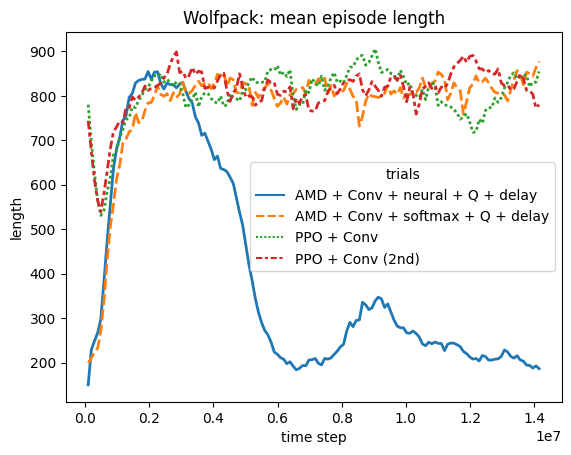

In [39]:
new_df = df[df['tag'] == 'ray/tune/episode_len_mean']
new_df = new_df[new_df['trials'].isin([
    # 'AMD + LSTM + softmax + R + delay',
    # 'AMD + LSTM + softmax + R',
    'AMD + Conv + neural + Q + delay',
    'AMD + Conv + softmax + Q + delay',
    # 'AMD + LSTM + neural + Q + delay',
    # 'AMD + LSTM + softmax + Q + delay',
    'PPO + Conv',
    'PPO + Conv (2nd)',
    # 'PPO + LSTM',
    # 'PPO + LSTM (2nd)'
])]
new_df['value'] = new_df['value'].ewm(com=5).mean()

g = sns.lineplot(
    data=new_df,
    x='step',
    y='value',
    hue='trials',
    legend='full',
    style='trials',
    linewidth=2,
    dashes=True,
    markers=False,
    seed=1234,
)
g.set(xlabel='time step', ylabel='length', title='Wolfpack: mean episode length')
plt.savefig('./wolfpack_conv_length.pdf')

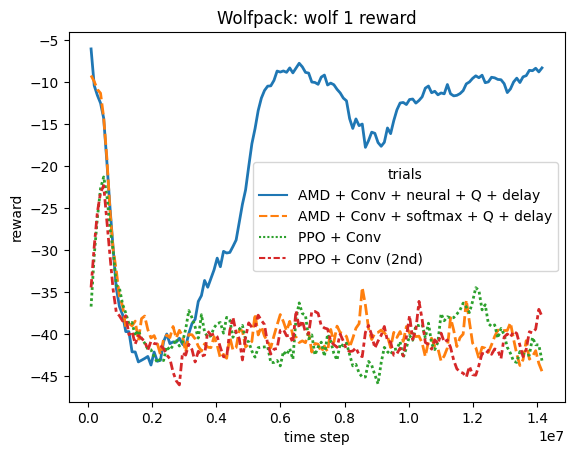

In [40]:
new_df = df[df['tag'] == 'ray/tune/policy_reward_mean/wolf_1']
new_df = new_df[new_df['trials'].isin([
    # 'AMD + LSTM + softmax + R + delay',
    # 'AMD + LSTM + softmax + R',
    'AMD + Conv + neural + Q + delay',
    'AMD + Conv + softmax + Q + delay',
    # 'AMD + LSTM + neural + Q + delay',
    # 'AMD + LSTM + softmax + Q + delay',
    'PPO + Conv',
    'PPO + Conv (2nd)'
    # 'PPO + LSTM',
    # 'PPO + LSTM (2nd)'
])]
new_df['value'] = new_df['value'].ewm(com=3).mean()
g = sns.lineplot(
    data=new_df,
    x='step',
    y='value',
    hue='trials',
    legend='full',
    style='trials',
    linewidth=2,
    dashes=True,
    markers=False,
    seed=1234,
)
g.set(xlabel='time step', ylabel='reward', title='Wolfpack: wolf 1 reward')
plt.savefig('./wolfpack_conv_reward_w1.pdf')

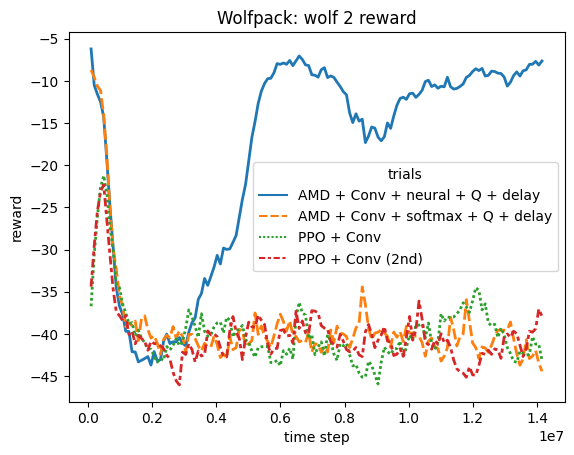

In [41]:
new_df = df[df['tag'] == 'ray/tune/policy_reward_mean/wolf_2']
new_df = new_df[new_df['trials'].isin([
    # 'AMD + LSTM + softmax + R + delay',
    # 'AMD + LSTM + softmax + R',
    'AMD + Conv + neural + Q + delay',
    'AMD + Conv + softmax + Q + delay',
    # 'AMD + LSTM + neural + Q + delay',
    # 'AMD + LSTM + softmax + Q + delay',
    'PPO + Conv',
    'PPO + Conv (2nd)'
    # 'PPO + LSTM',
    # 'PPO + LSTM (2nd)'
])]
new_df['value'] = new_df['value'].ewm(com=3).mean()
g = sns.lineplot(
    data=new_df,
    x='step',
    y='value',
    hue='trials',
    legend='full',
    style='trials',
    linewidth=2,
    dashes=True,
    markers=False,
    seed=1234,
)
g.set(xlabel='time step', ylabel='reward', title='Wolfpack: wolf 2 reward')
plt.savefig('./wolfpack_conv_reward_w2.pdf')

## Env screenshot

In [42]:
# add module
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
from gymnasium.utils import seeding
from PIL import Image

from core.environments.wolfpack.env import Wolfpack

rng, _ = seeding.np_random(114514)
env = Wolfpack(rng, )
env.render_mode = 'rgb_array'

In [47]:
env.reset()
img = Image.fromarray(env.render())
img.save('./wolfpack_env.png', 'PNG')